In [2]:
from google.colab import files
uploaded = files.upload()

Saving hcc_dataset.csv to hcc_dataset.csv


# **Imports e leitura do ficheiro**

In [3]:
import matplotlib.pyplot as  plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import MaxNLocator
import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [4]:
df = pd.read_csv("hcc_dataset.csv",  encoding='utf-8', na_values='?', keep_default_na=False)

# **Data Exploration**

## **Análise generalizada**

Analisando os feature types do dataset, vemos que várias variáveis são reconhecidas como objects.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

In [6]:
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives


In [7]:
df.isnull().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

Geramos histogramas que mostram as colunas com valores em falta e que mostra a distribuição entre valores nulos e não nulos.

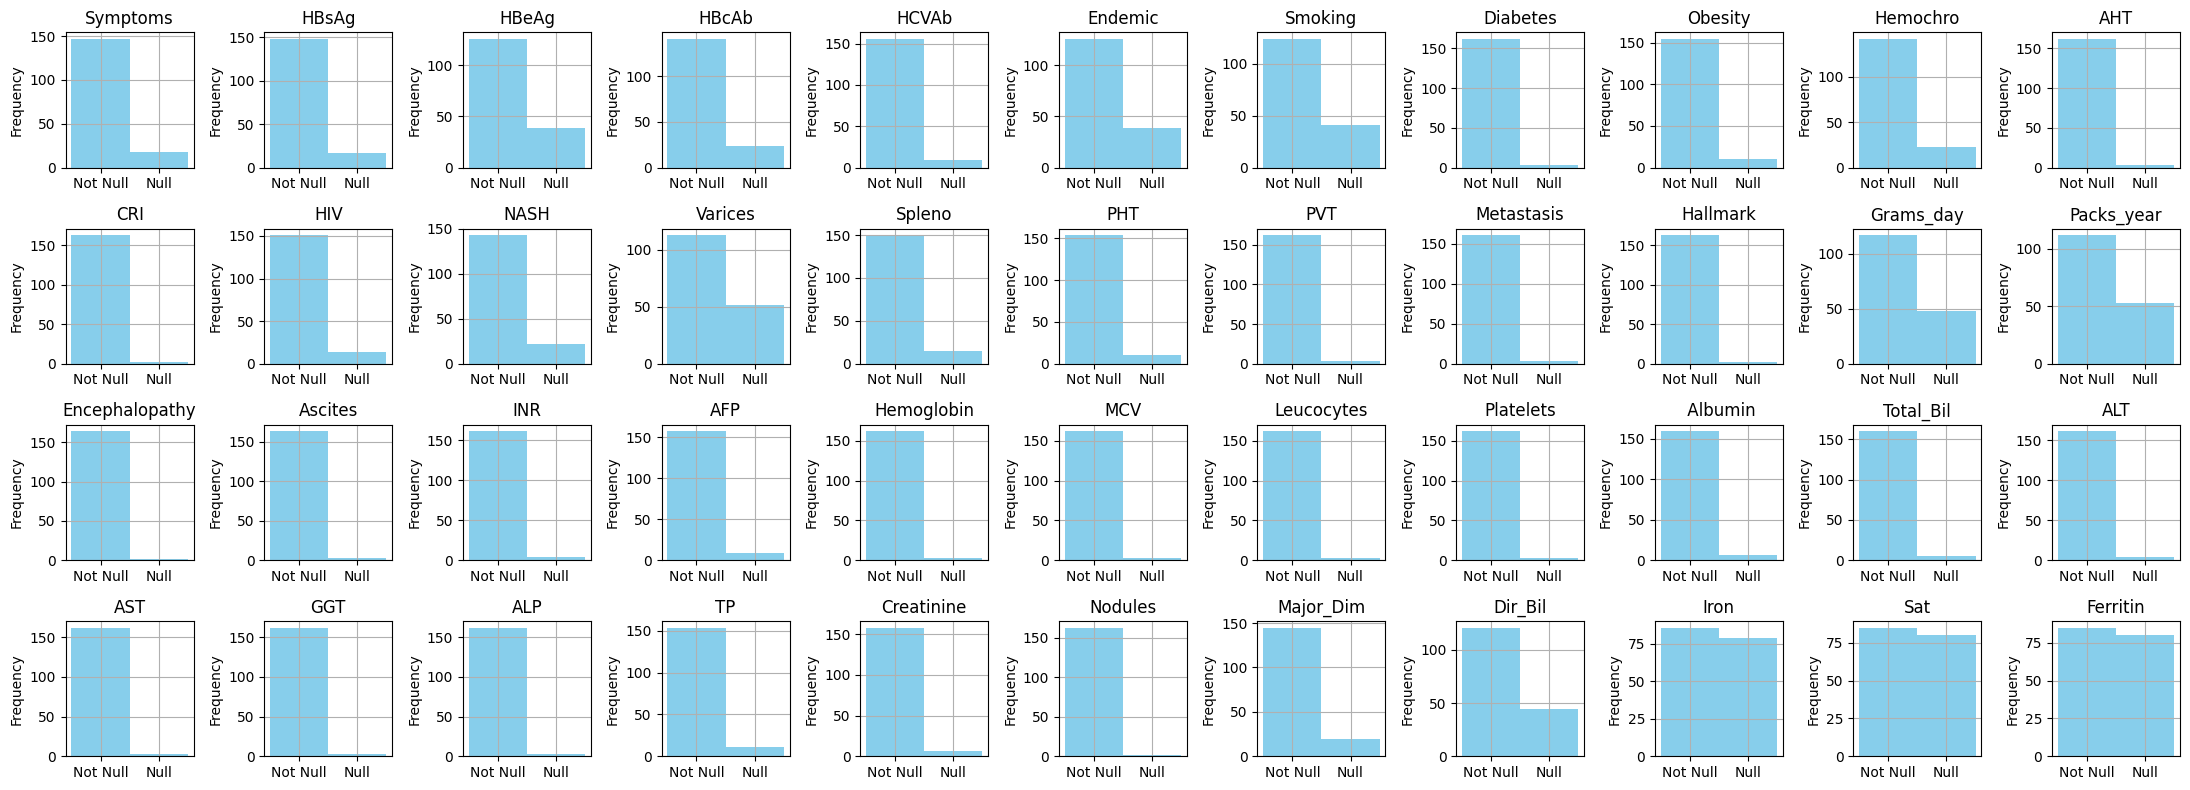

In [8]:
columns_with_null = df.columns[df.isnull().any()]

num_rows = (len(columns_with_null) + 10) // 11

fig, axes = plt.subplots(num_rows, 11, figsize=(22, 2 * num_rows))
for i, column in enumerate(columns_with_null):
    row = i // 11
    col = i % 11
    df[column].isnull().astype(int).hist(ax=axes[row, col], color='skyblue', bins=2)
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xticks([0.25, 0.75])
    axes[row, col].set_xticklabels(['Not Null', 'Null'])

plt.tight_layout()
plt.show()

Analisamos o número de linhas e colunas (features).

In [9]:
df.shape

(165, 50)

<Axes: ylabel='count'>

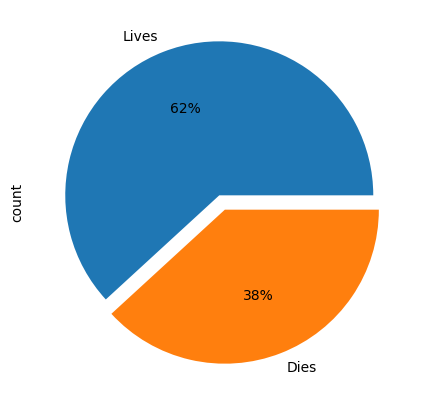

In [10]:
counts = df['Class'].value_counts()

counts.plot.pie(ylabel='count', figsize=(5, 5), autopct='%1.0f%%',explode = (0.05, 0.05))


## **Análise de features numéricas**

### **Descrição das variáveis**

In [11]:
df.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,...,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,...,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,...,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,...,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,...,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,...,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,...,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,...,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


### **Análise de valores negativos**

In [12]:
data = df.select_dtypes(include=['float64', 'int64'])
(data<0).any().any()

False

### **Análise da variância**

In [13]:
variances = df.select_dtypes(include = ['float', 'int']).var() # Calcular a variância de todas as colunas com valores numéricos
pd.DataFrame(variances, columns=['Variance'])

,Variance
Age,1.774100e+02
Grams_day,5.818284e+03
Packs_year,2.658963e+03
INR,2.283083e-01
AFP,2.223031e+10
Hemoglobin,4.602041e+00
MCV,7.065824e+01
Leucocytes,8.462898e+06
Platelets,1.147440e+10
Albumin,4.694059e-01


### **Análise de outliers**

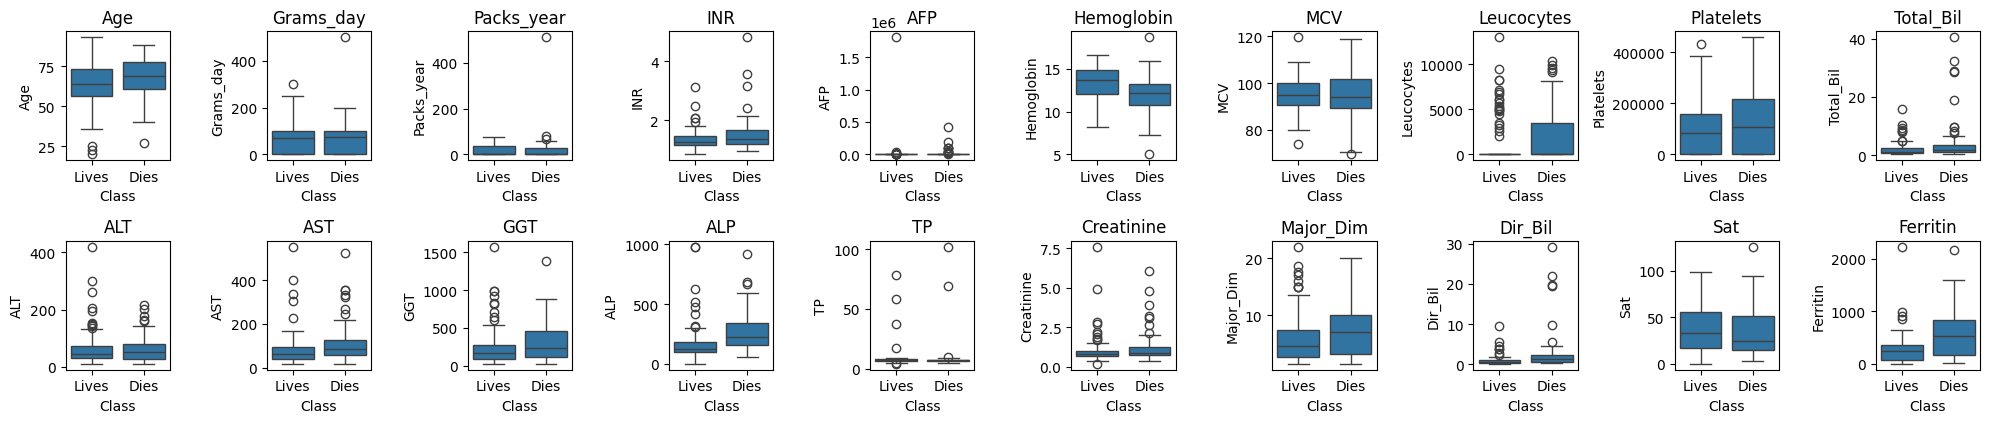

Percentagem de outliers: 5.533596837944664


In [14]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Definir os limites superior e inferior para detetar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = numeric_features[(numeric_features < lower_bound) | (numeric_features > upper_bound)]

num_cols = len(outliers.columns)
num_rows = -(-num_cols // 10)

cols_outliers = []
n_o = 0

plt.figure(figsize=(20, num_rows * 2))
i = 0
for col in outliers:
    d = outliers[col]
    n = d.count()
    n_o += n
    if n > 0:
        cols_outliers.append(col)
        row_index = i // 10
        col_index = i % 10
        plt.subplot(num_rows, 10, i + 1)
        sns.boxplot(x='Class', y=col, data=df)
        plt.title(f'{col}')
        plt.xlabel('Class')
        plt.ylabel(col)
        i = i + 1

plt.tight_layout()
plt.show()


total_observations = numeric_features.size
outliers_percentage = (n_o / total_observations) * 100
print("Percentagem de outliers:", outliers_percentage)

### **Análise da correlação das features com a classe**

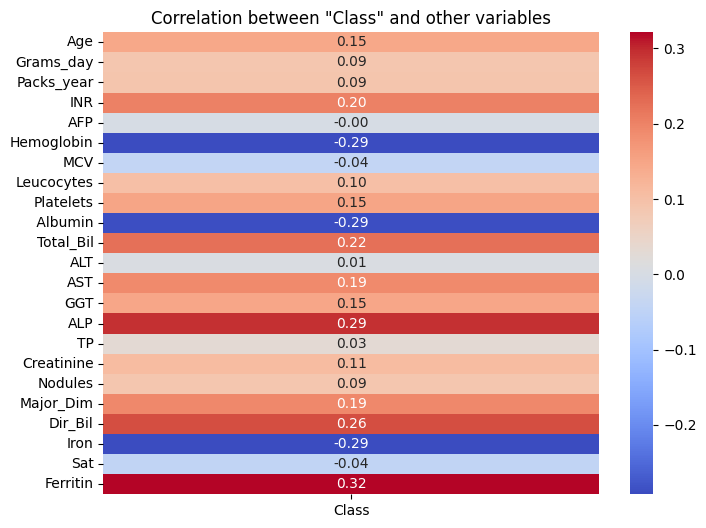

In [15]:
df_copy = df.copy()
df_copy['Class'] = (df_copy['Class'] == 'Dies').astype(int) # codificar com os valores 0/1

numeric_features = df_copy.select_dtypes(include=['float64', 'int64']) # Selecionar features numéricas
corr_n = numeric_features.corr()[['Class']].drop('Class')

# Visualizar a matriz de correlação com um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_n, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between "Class" and other variables')
plt.show()

### **Análise da correlação entre features**

In [16]:
df_copy = df.copy()
df_copy['Class'] = (df_copy['Class'] == 'Dies').astype(int)

numeric_features = df_copy.select_dtypes(include=['float64', 'int64']) # Selecionar features numéricas
corr_n = numeric_features.corr()

high_corr_n = []

print('Features com correlação superior a 0.7 em módulo: ')

for col in numeric_features:
    values = corr_n[[col]]
    for i in values.index:
        c = values.loc[i].values[0]
        if (c > 0.7 or c < -0.7) and i != col and (i, col) not in high_corr_n:
                high_corr_n.append((col, i))
                print(f'    -{col} e {i}: {c}')

Features com correlação superior a 0.7 em módulo: 
    -Total_Bil e Dir_Bil: 0.9781242167334244
    -ALT e AST: 0.7277804026822748
    -Iron e Sat: 0.7829572388942535


### **Análise da distribuição das variáveis**

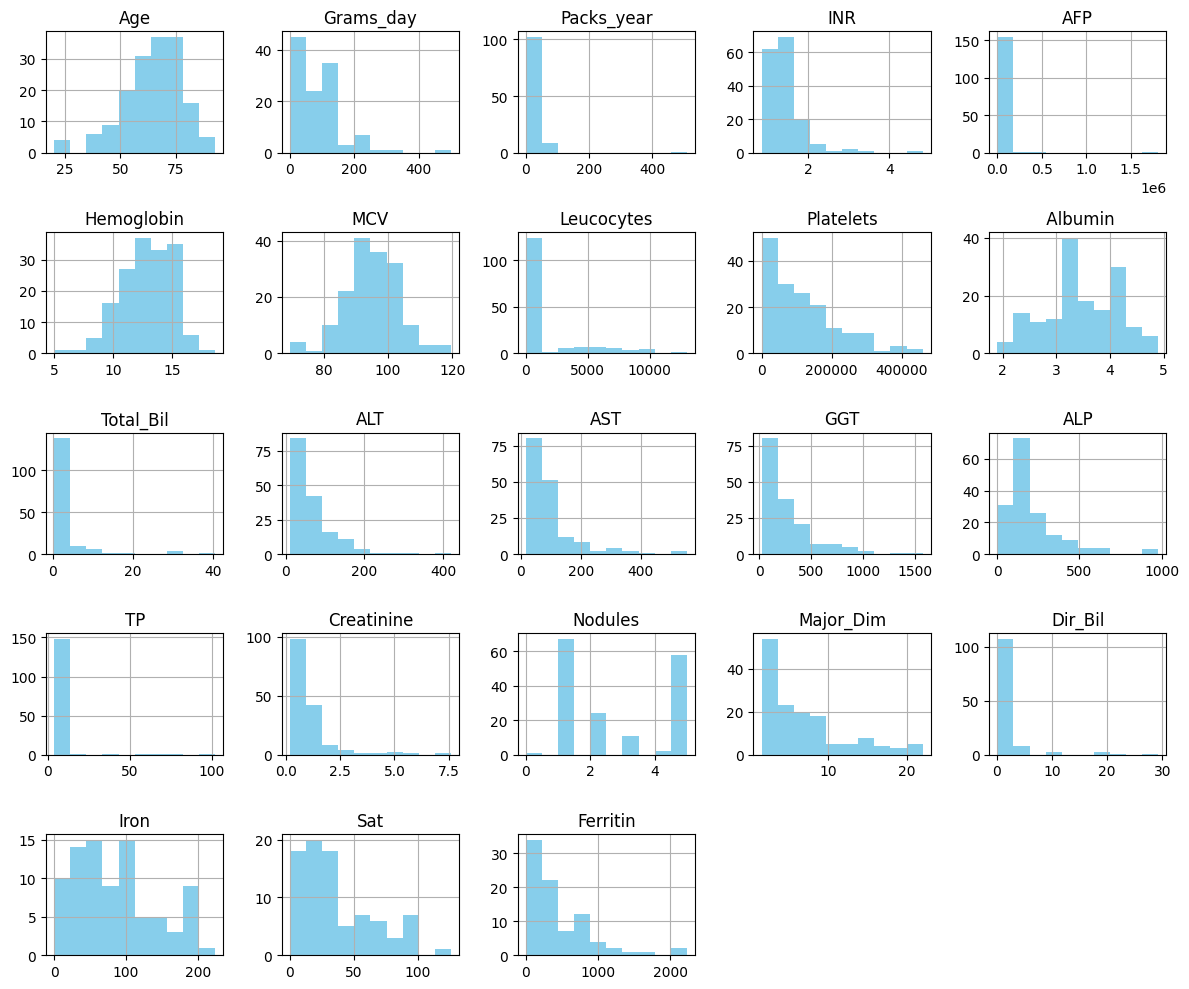

In [17]:
data = df.select_dtypes(include=['float64', 'int64'])
data.hist(figsize=(12, 10), bins=10, color='skyblue')
plt.tight_layout()
plt.show()

## **Análise de features categóricas**

### **Análise da correlação das features com a classe**

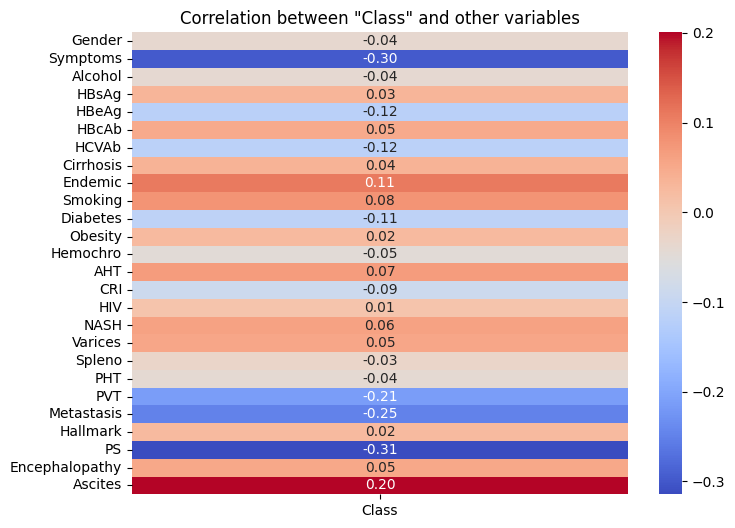

In [18]:
df_copy = df.copy()
df_copy['Class'] = (df_copy['Class'] == 'Dies').astype(int)
categorical_features = df.select_dtypes(include = ["object"])

corr_c = pd.DataFrame({'Class' : []})

label_encoder = LabelEncoder()

for column in categorical_features.columns[:-1]:
  d = categorical_features[[column, 'Class']]
  d = d.dropna()
  d[column] = label_encoder.fit_transform(d[column])
  d['Class'] = label_encoder.fit_transform(d['Class'])
  corr = d.corr()[['Class']]
  corr_c = pd.concat([corr_c, corr], axis=0).drop('Class')


# Visualizar a matriz de correlação com um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_c, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between "Class" and other variables')
plt.show()

### **Análise da correlação entre features**

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


categorical_features = df.select_dtypes(include = ["object"])
for col in categorical_features:
    categorical_features[col] = label_encoder.fit_transform(categorical_features[col])

corr = categorical_features.corr()

high_corr_c = []

print('Features com correlação superior a 0.7 em módulo: ')

for col in categorical_features:
    values = corr[[col]]
    for i in values.index:
        c = values.loc[i].values[0]
        if (c > 0.7 or c < -0.7) and i != col and (i, col) not in high_corr_c:
                high_corr_c.append((col, i))
                print(f'    -{col} e {i}: {c}')


Features com correlação superior a 0.7 em módulo: 
    -HBsAg e HBcAb: 0.7649653259281777


### **Análise da distribuição das variáveis**

In [20]:
categorical_features = df.select_dtypes(include = ["object"]) # selecionar features categóricas

for variavel in categorical_features:
    contagem_valores_unicos = df[variavel].value_counts()
    print(contagem_valores_unicos)
    print()

Gender
Male      133
Female     32
Name: count, dtype: int64

Symptoms
Yes    94
No     53
Name: count, dtype: int64

Alcohol
Yes    122
No      43
Name: count, dtype: int64

HBsAg
No     132
Yes     16
Name: count, dtype: int64

HBeAg
No     125
Yes      1
Name: count, dtype: int64

HBcAb
No     103
Yes     38
Name: count, dtype: int64

HCVAb
No     122
Yes     34
Name: count, dtype: int64

Cirrhosis
Yes    149
No      16
Name: count, dtype: int64

Endemic
No     116
Yes     10
Name: count, dtype: int64

Smoking
Yes    63
No     61
Name: count, dtype: int64

Diabetes
No     106
Yes     56
Name: count, dtype: int64

Obesity
No     135
Yes     20
Name: count, dtype: int64

Hemochro
No     135
Yes      7
Name: count, dtype: int64

AHT
No     103
Yes     59
Name: count, dtype: int64

CRI
No     143
Yes     20
Name: count, dtype: int64

HIV
No     148
Yes      3
Name: count, dtype: int64

NASH
No     135
Yes      8
Name: count, dtype: int64

Varices
Yes    69
No     44
Name: count, dtype: 

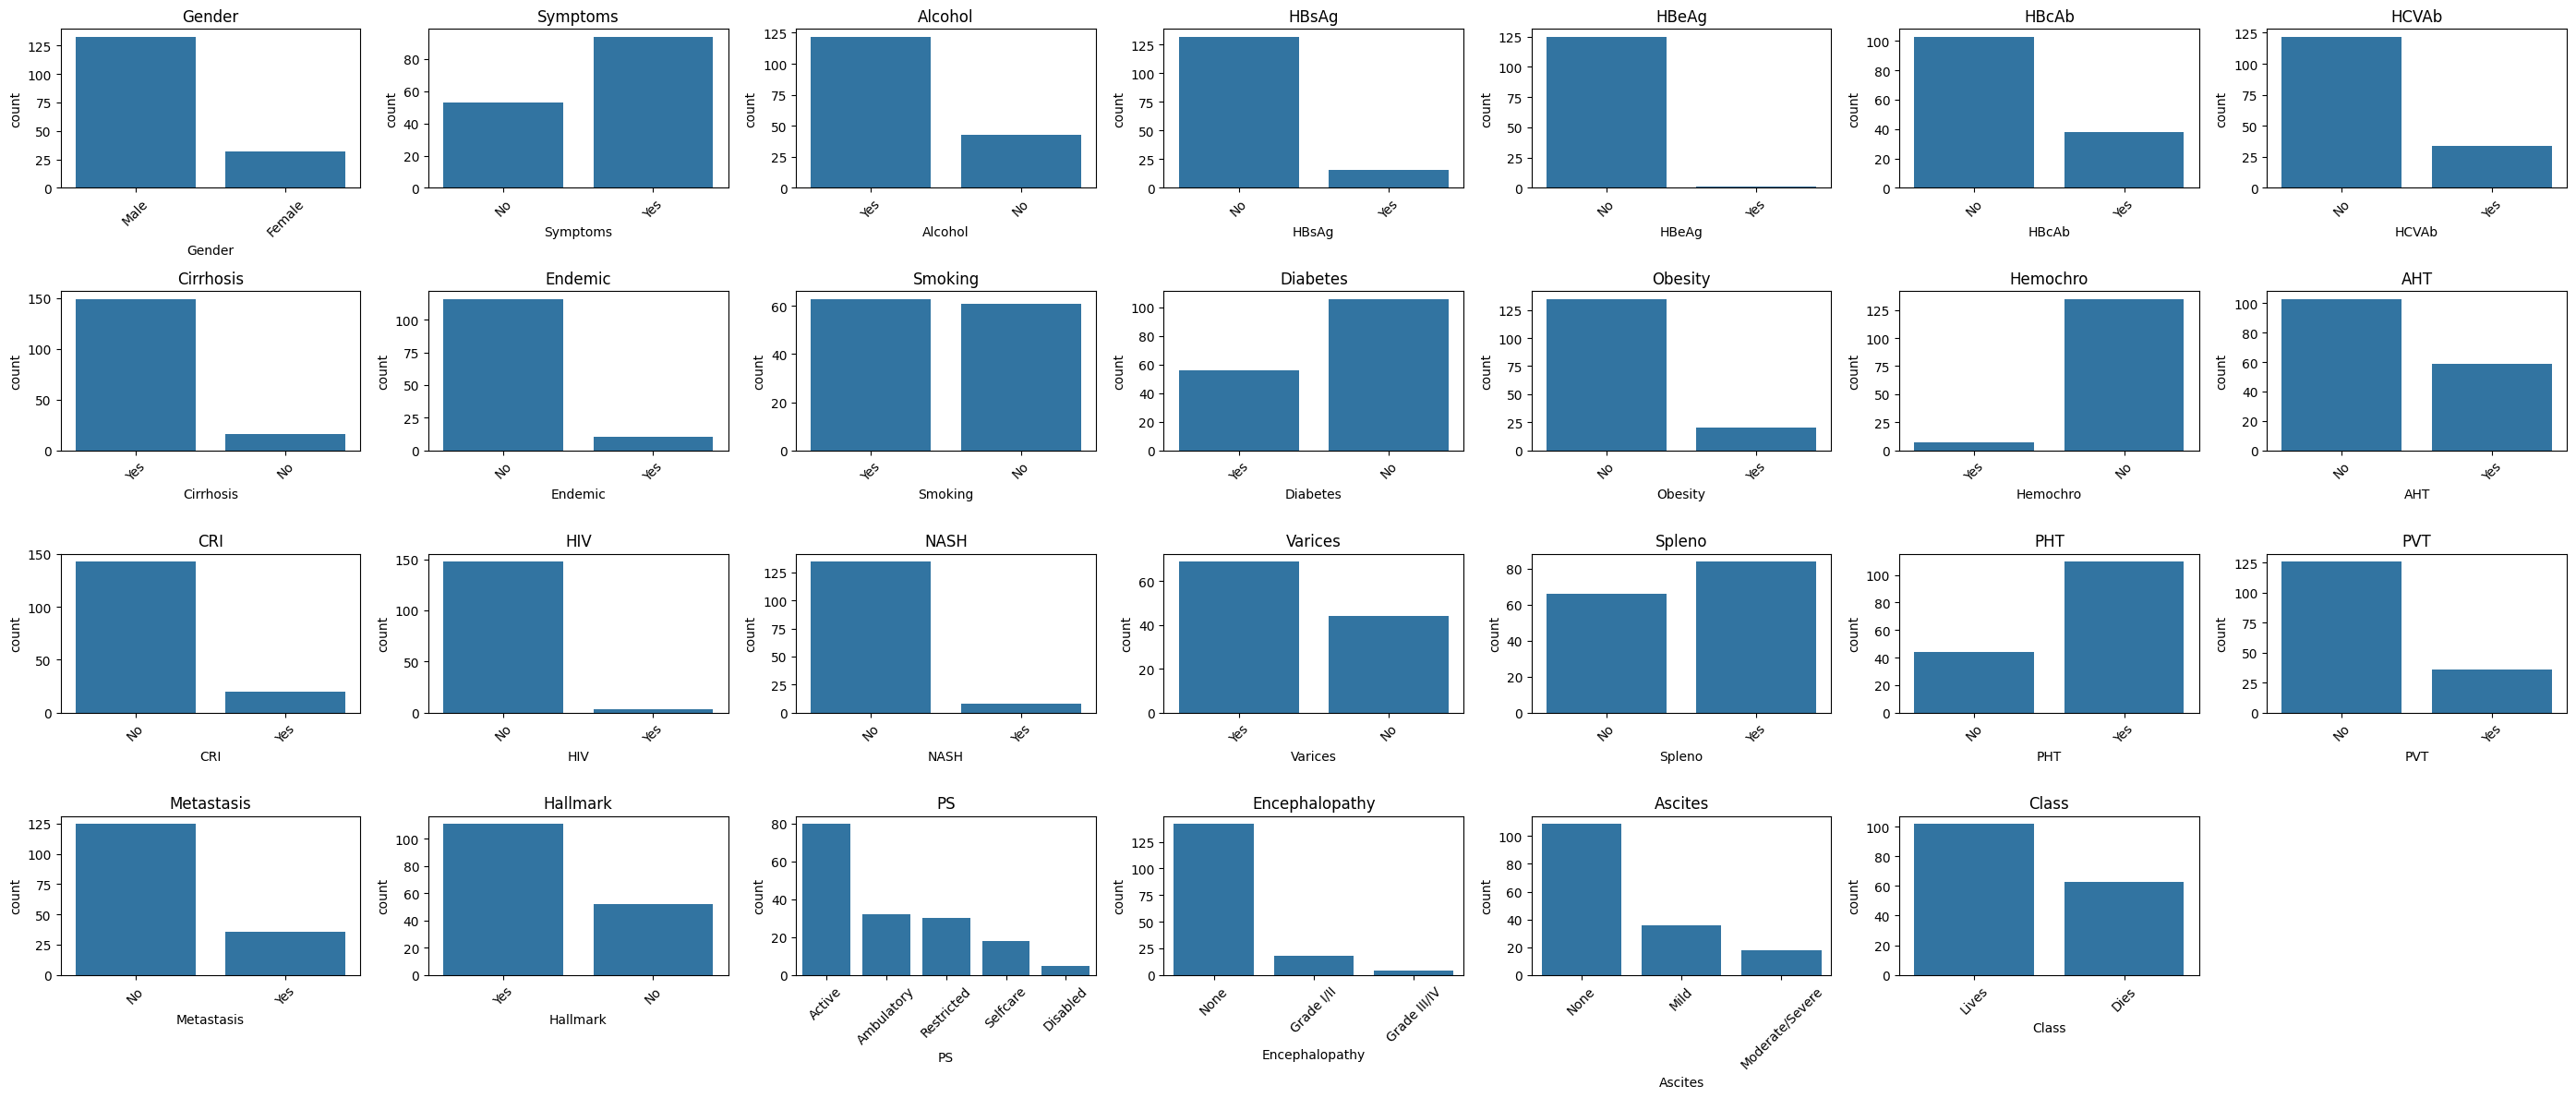

In [21]:
# Visualizar histogramas das features categóricas
n_cols = 7
n_rows = math.ceil(len(categorical_features.columns) / n_cols)
plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(categorical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()

# **Data Preprocessing**

Vamos criar uma cópia do dataframe, que será o dataframe processado, e comparar futuramente o seu desempenho face ao dataframe original apenas com os valores null substituidos.

In [22]:
df_p = df.copy()

## **Dados numéricos**

### **Tratamento de ouliers**

Para resolver o problema dos outliers, decidimos substituir estes valores pelo valor da mediana da amostra.

In [23]:
for col in cols_outliers:
  lb = lower_bound[col]
  up = upper_bound[col]
  median = df_p[col].median()
  df_p[col] = df_p[col].mask((df_p[col] > up) | (df_p[col]< lb), median)

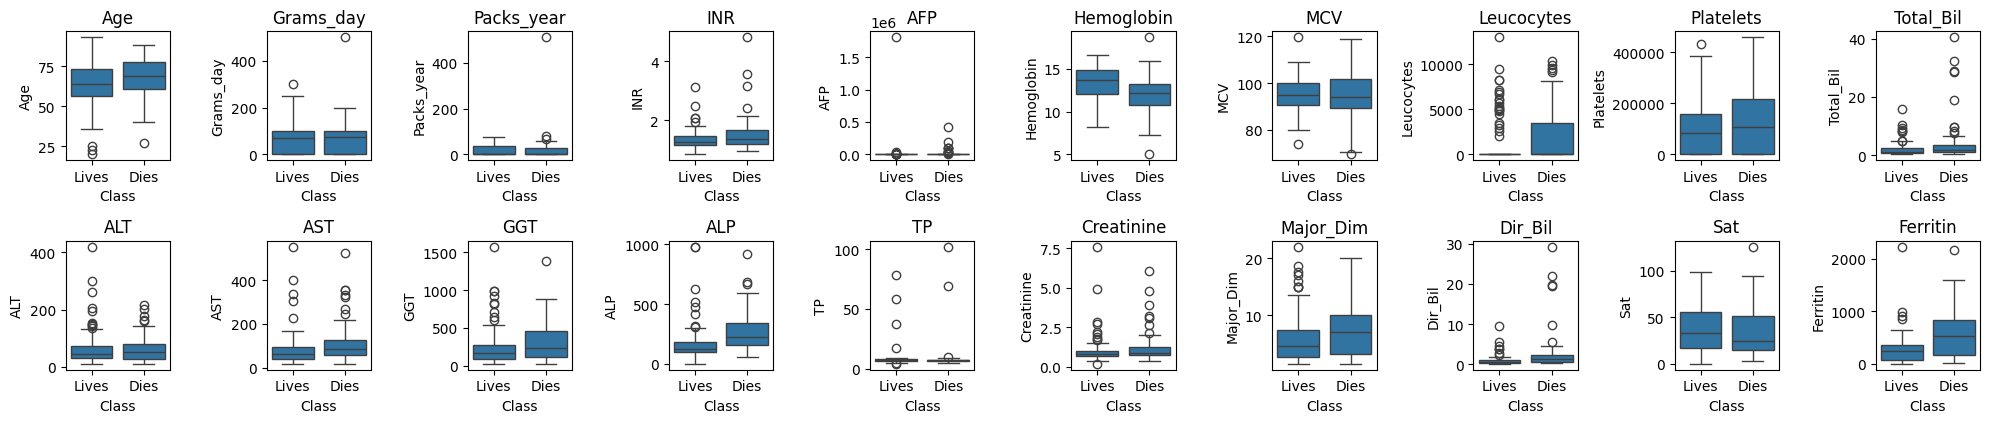

Percentagem de outliers: 3.0303030303030303


In [24]:
numeric_features = df_p.select_dtypes(include=['float64', 'int64'])

Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Definir os limites superior e inferior para detetar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = numeric_features[(numeric_features < lower_bound) | (numeric_features > upper_bound)]

num_cols = len(outliers.columns)
num_rows = -(-num_cols // 10)

n_o = 0

plt.figure(figsize=(20, num_rows * 2))
i = 0
for col in cols_outliers:
    d = outliers[col]
    n = d.count()
    n_o += n
    row_index = i // 10
    col_index = i % 10
    plt.subplot(num_rows, 10, i + 1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(col)
    plt.ylabel(col)
    i = i + 1

plt.tight_layout()
plt.show()

total_observations = numeric_features.size
outliers_percentage = (n_o / total_observations) * 100
print("Percentagem de outliers:", outliers_percentage)

### **Substituição dos Nulls**

Iremos substituir os Nulls das colunas numéricas pela média da coluna.

In [25]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
numeric_features.fillna(numeric_features.mean(), inplace=True)
df[numeric_features.columns] = numeric_features

numeric_features = df_p.select_dtypes(include=['float64', 'int64'])
numeric_features.fillna(numeric_features.mean(), inplace=True)
df_p[numeric_features.columns] = numeric_features

### **Eliminação de variáveis com baixa correlação**

Vamos considerar variáveis viáveis que tenham uma correlação > 0.1 em módulo com a 'Class'.

In [26]:
cols_chosen = corr_n[(corr_n['Class'] >= 0.1) | (corr_n['Class'] <= -0.1)].axes[0].tolist()

cols_deleted = corr_n[(corr_n['Class'] < 0.1) & (corr_n['Class'] > -0.1)].axes[0].tolist()

print('Vamos considerar as colunas:')
print(cols_chosen)
print('Vamos apagar as colunas:')
print(cols_deleted)

Vamos considerar as colunas:
['Age', 'INR', 'Hemoglobin', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'AST', 'GGT', 'ALP', 'Creatinine', 'Major_Dim', 'Dir_Bil', 'Iron', 'Ferritin', 'Class']
Vamos apagar as colunas:
['Grams_day', 'Packs_year', 'AFP', 'MCV', 'ALT', 'TP', 'Nodules', 'Sat']


In [27]:
df_p = df_p.drop(columns=cols_deleted)

## **Dados categóricos**

### **Substituição dos nulls**

Iremos substituir os Nulls das colunas categóricas pela moda da coluna.

In [28]:
categorical_features = df.select_dtypes(include=["object"])
categorical_mode = categorical_features.mode().iloc[0]
categorical_features.fillna(categorical_mode, inplace=True)
df[categorical_features.columns] = categorical_features

categorical_features = df_p.select_dtypes(include=["object"])
categorical_mode = categorical_features.mode().iloc[0]
categorical_features.fillna(categorical_mode, inplace=True)
df_p[categorical_features.columns] = categorical_features

### **Eliminação de variáveis com baixa correlação**

Vamos considerar variáveis viáveis que tenham uma correlação > 0.1 em módulo com a 'Class'.

In [29]:
cols_chosen = corr_c[(corr_c['Class'] >= 0.1) | (corr_c['Class'] <= -0.1)].axes[0].tolist()

cols_deleted = corr_c[(corr_c['Class'] < 0.1) & (corr_c['Class'] > -0.1)].axes[0].tolist()

print('Vamos considerar as colunas:')
print(cols_chosen)
print('Vamos apagar as colunas:')
print(cols_deleted)

Vamos considerar as colunas:
['Symptoms', 'HBeAg', 'HCVAb', 'Endemic', 'Diabetes', 'PVT', 'Metastasis', 'PS', 'Ascites']
Vamos apagar as colunas:
['Gender', 'Alcohol', 'HBsAg', 'HBcAb', 'Cirrhosis', 'Smoking', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'Hallmark', 'Encephalopathy']


In [30]:
df_p = df_p.drop(columns=cols_deleted) # eliminar colunas referidas anteriormente

# **Data Modeling (Supervised Learning)**

## **Encoding das variáveis**

In [31]:
dfs = [df, df_p]

In [32]:
dfs_e = []
fn = []
for d in dfs:
  categorical_columns = d.select_dtypes(include=['object']).drop('Class', axis = 1).columns.tolist()
  encoder = OneHotEncoder(sparse_output=False)
  one_hot_encoded = encoder.fit_transform(d[categorical_columns])
  one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
  df_encoded = pd.concat([d, one_hot_df], axis=1)
  df_encoded = df_encoded.drop(categorical_columns, axis=1)
  dfs_e.append(df_encoded)
  feature_names = df_encoded.columns.values.tolist()
  feature_names.remove('Class')
  fn.append(feature_names)

## **Decision Tree**

Dataframe sem processamento

In [ ]:
d = dfs_e[0]
f = fn[0]
X_train, X_test, y_train, y_test_dt = train_test_split(d[f], d['Class'], stratify= d['Class'],test_size=0.2, random_state=13) # dividir os dados em conjuntos de treino e teste
clf = DecisionTreeClassifier(random_state=15)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

print(classification_report(y_test_dt, y_pred_dt)) # analisar desempenho do modelo

              precision    recall  f1-score   support

        Dies       0.62      0.62      0.62        13
       Lives       0.75      0.75      0.75        20

    accuracy                           0.70        33
   macro avg       0.68      0.68      0.68        33
weighted avg       0.70      0.70      0.70        33



Dataframe com processamento

In [ ]:
dp = dfs_e[1]
fp = fn[1]
X_train, X_test, y_train, y_test_dt = train_test_split(dp[fp], dp['Class'], stratify= dp['Class'],test_size=0.2, random_state=13)
clf = DecisionTreeClassifier(random_state=15)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

print(classification_report(y_test_dt, y_pred_dt))

              precision    recall  f1-score   support

        Dies       0.71      0.77      0.74        13
       Lives       0.84      0.80      0.82        20

    accuracy                           0.79        33
   macro avg       0.78      0.78      0.78        33
weighted avg       0.79      0.79      0.79        33



##**Algoritmo KNN**

Dataframe sem processamento

In [ ]:
d = dfs_e[0]
f = fn[0]

scaler = StandardScaler()
x = d[f]
y = d['Class']
x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test_knn = train_test_split(x, y, stratify= d['Class'],test_size=0.2, random_state=13)

knn = KNeighborsClassifier(n_neighbors=4)  # Podemos ajustar o valor de k
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

        Dies       0.75      0.92      0.83        13
       Lives       0.94      0.80      0.86        20

    accuracy                           0.85        33
   macro avg       0.85      0.86      0.85        33
weighted avg       0.87      0.85      0.85        33



Dataframe com processamento

In [ ]:
d = dfs_e[1]
f = fn[1]

scaler = StandardScaler()
x = d[f]
y = d['Class']
x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test_knn = train_test_split(x, y, stratify= d['Class'],test_size=0.2, random_state=13)

knn = KNeighborsClassifier(n_neighbors=4)  # Podemos ajustar o valor de k
knn.fit(X_train, y_train)
y_pred:knn = knn.predict(X_test)

print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

        Dies       0.75      0.92      0.83        13
       Lives       0.94      0.80      0.86        20

    accuracy                           0.85        33
   macro avg       0.85      0.86      0.85        33
weighted avg       0.87      0.85      0.85        33



#### **Analisar a raiz quadrada do erro quadrático médio (RMSE) para valores de k de 1 a 20**

In [ ]:
d = dfs_e[1]
f = fn[1]

scaler = StandardScaler()
x = d[f]
y = d['Class']
x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify= d['Class'],test_size=0.2, random_state=13)

rmse_val = []
print('Valor de RMSE:')

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    y_test_e = (y_test == 'Lives').astype(int)
    y_pred_e = (y_pred == 'Lives').astype(int)
    error = math.sqrt(mean_squared_error(y_test_e,y_pred_e))

    rmse_val.append(error)
    print(f'    k = {k}: {round(error, 2)}')

Valor de RMSE:
    k = 1: 0.49
    k = 2: 0.49
    k = 3: 0.46
    k = 4: 0.46
    k = 5: 0.52
    k = 6: 0.55
    k = 7: 0.55
    k = 8: 0.52
    k = 9: 0.55
    k = 10: 0.52
    k = 11: 0.52
    k = 12: 0.52
    k = 13: 0.52
    k = 14: 0.52
    k = 15: 0.52
    k = 16: 0.52
    k = 17: 0.55
    k = 18: 0.55
    k = 19: 0.58
    k = 20: 0.55


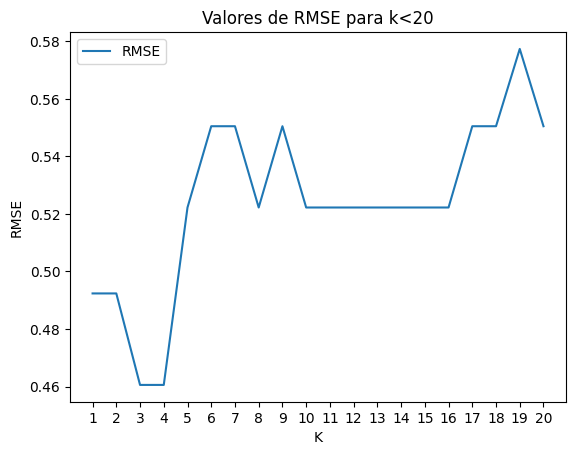

In [ ]:
# Visualizar o gráfico dos valores de RMSE para k<20
curve = pd.DataFrame(rmse_val, columns=['RMSE'])
curve.index = range(1, len(curve) + 1)
ax = curve.plot()
ax.set_title('Valores de RMSE para k<20')
ax.set_xlabel('K')
ax.set_ylabel('RMSE')
ax.set_xticks(range(1, len(rmse_val)+1))
plt.show()

## **Regressão logística**

Dataframe sem processamento

In [40]:
d = dfs_e[0]
f = fn[0]
X_train, X_test, y_train, y_test_log = train_test_split(d[f], d['Class'], stratify= d['Class'],test_size=0.2, random_state=13)

model = LogisticRegression(max_iter=1000, random_state=13)

model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)

print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

        Dies       0.83      0.77      0.80        13
       Lives       0.86      0.90      0.88        20

    accuracy                           0.85        33
   macro avg       0.85      0.83      0.84        33
weighted avg       0.85      0.85      0.85        33



Dataframe com processamento

In [ ]:
d = dfs_e[1]
f = fn[1]
X_train, X_test, y_train, y_test_log = train_test_split(d[f], d['Class'], stratify= d['Class'],test_size=0.2, random_state=13)

model = LogisticRegression(max_iter=1000, random_state=13)

model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)

print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

        Dies       0.82      0.69      0.75        13
       Lives       0.82      0.90      0.86        20

    accuracy                           0.82        33
   macro avg       0.82      0.80      0.80        33
weighted avg       0.82      0.82      0.81        33



# **Data Evaluation**

Model: Decision Tree
              precision    recall  f1-score   support

        Dies       0.71      0.77      0.74        13
       Lives       0.84      0.80      0.82        20

    accuracy                           0.79        33
   macro avg       0.78      0.78      0.78        33
weighted avg       0.79      0.79      0.79        33



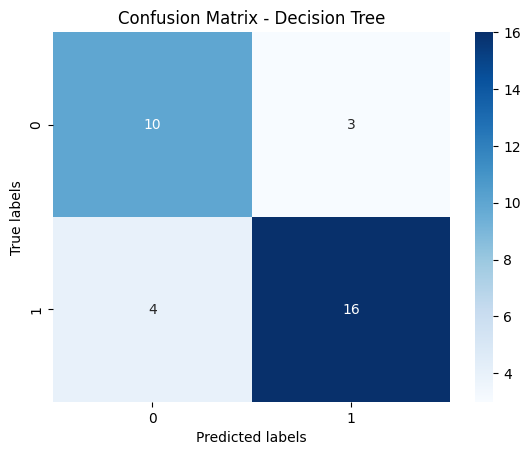

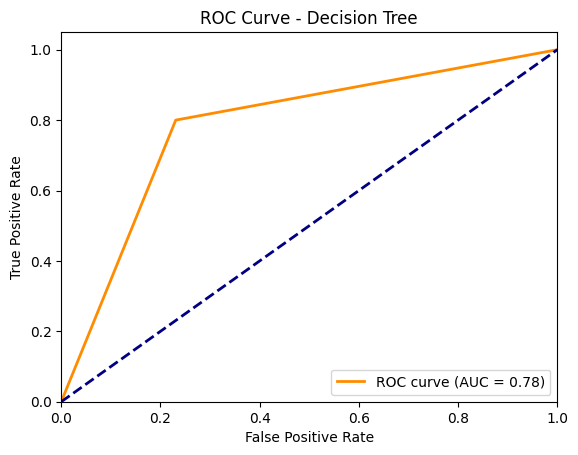

Model: KNN
              precision    recall  f1-score   support

        Dies       0.75      0.92      0.83        13
       Lives       0.94      0.80      0.86        20

    accuracy                           0.85        33
   macro avg       0.85      0.86      0.85        33
weighted avg       0.87      0.85      0.85        33



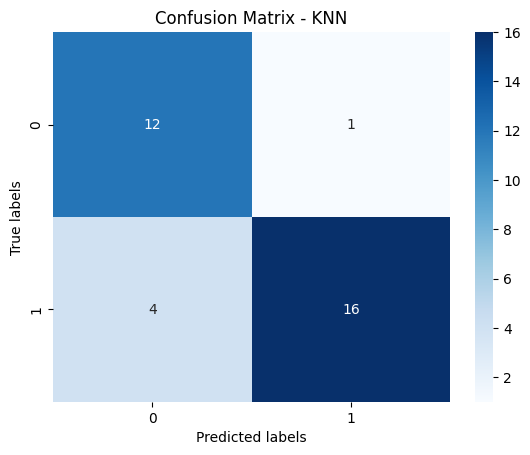

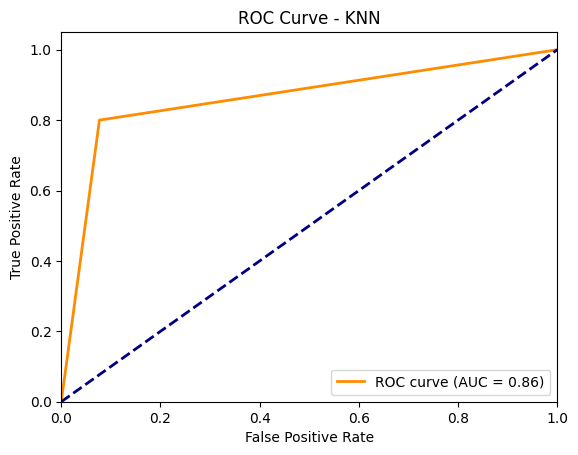

Model: Logistic Regression
              precision    recall  f1-score   support

        Dies       0.82      0.69      0.75        13
       Lives       0.82      0.90      0.86        20

    accuracy                           0.82        33
   macro avg       0.82      0.80      0.80        33
weighted avg       0.82      0.82      0.81        33



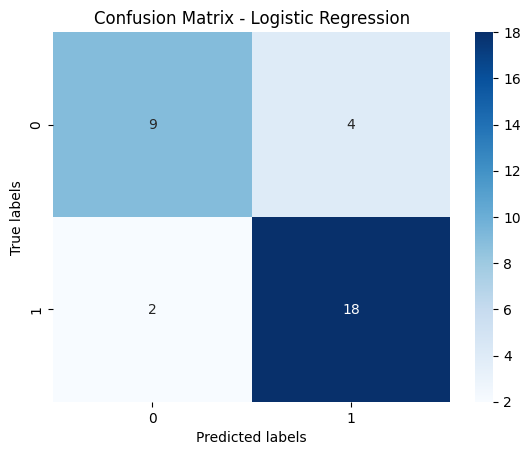

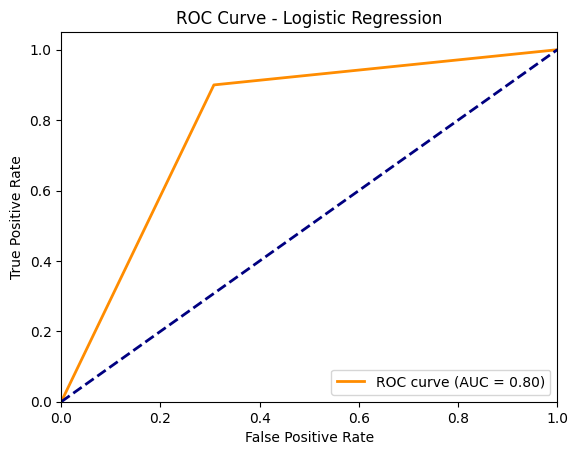

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Definir uma função para fazer a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Definir uma função para fazer a curva ROC
def plot_roc_curve(y_true, y_pred, title='ROC Curve'):
    y_true = (y_true == 'Lives').astype(int)
    y_pred = (y_pred == 'Lives').astype(int)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Definir uma função para comparar os resultados dos modelos
def compare_models(y_true, y_preds, names):
    for i, (y_pred, name) in enumerate(zip(y_preds, names)):
        print(f"Model: {name}")
        print(classification_report(y_true[i], y_pred))
        plot_confusion_matrix(y_true[i], y_pred, title=f'Confusion Matrix - {name}')
        plot_roc_curve(y_true[i], y_pred, title=f'ROC Curve - {name}')

# Executar a função para comparar os modelos
y_preds = [y_pred_dt, y_pred_knn, y_pred_log]
y_tests = [y_test_dt, y_test_knn, y_test_log]
model_names = ['Decision Tree', 'KNN', 'Logistic Regression']
compare_models(y_tests, y_preds, model_names)